# Growth data analyses

In [1]:
# libraries
library(tidyverse)
library(multcomp)
library(ggpubr)
library(latex2exp)
#library(broom)
#library(purrr)
#library(car)
#library(data.table)
library(formattable)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.1     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘TH.data’


The following object is masked from ‘package:MASS’:

    geyser



Attaching package: ‘formattable’


The following object is masked from ‘package:MASS’:

    area



********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavio

# Figure S1:

Here we present the results for the intial strains relative growth rate measurements:

In [2]:
# Read the data
ancestral =  read.csv("../../data/growth_ancestrals.csv")
head(ancestral,n=2)

,Treatment,Linage,Strain,Type,Experiment,Temperature,Max_deriv,Lag,k
,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>
1,Media,607,607P,Reference,18_3_18,43,0.001699398,477.6727,0.5504434
2,Media,607,607P,Reference,18_3_18,43,0.001868978,402.4976,0.5556532


In [3]:
# For each experiment
exp43 = ancestral %>% filter(Temperature == 43)
exp15 = ancestral %>% filter(Temperature == 15)
exp37 = ancestral %>% filter(Temperature == 37)

In [4]:
my_comparisons <- list(c("606P","607P") ,c("REL606","REL607"),c("606P","REL606"),c("607P","REL607"))

## Growth at $43^\circ{}C$

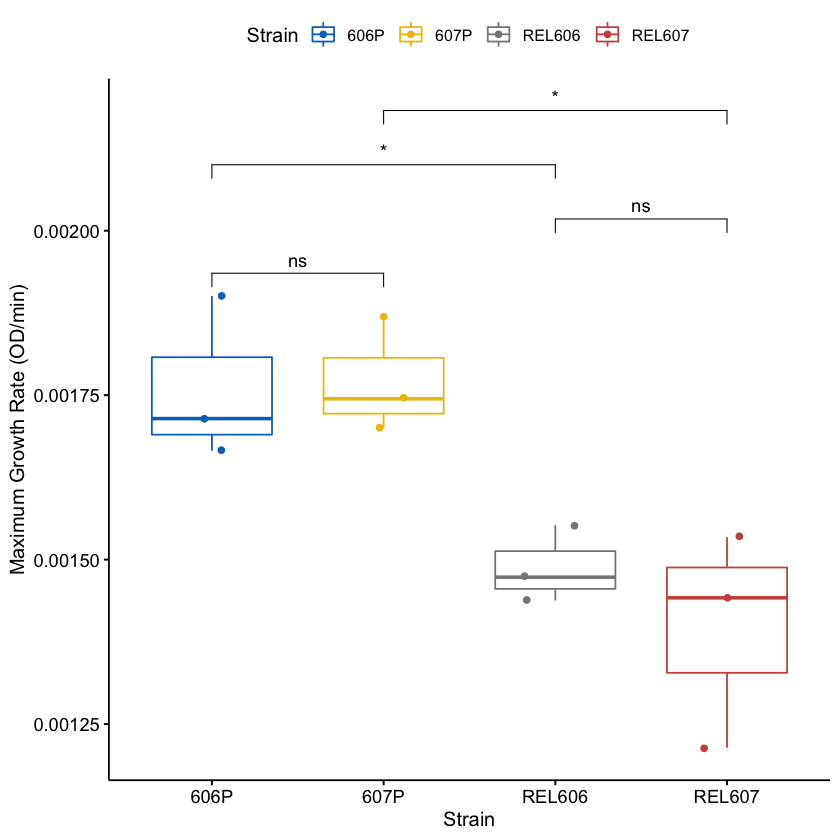

In [5]:
# Plot
#pdf("FigureS1_A.pdf")
ggboxplot(exp43, x = "Strain", y = "Max_deriv",
          color = "Strain", palette = "jco",add="jitter")+
stat_compare_means(comparisons = my_comparisons,method ="t.test",
                   method.args = list(alternative = "greater"),
                   p.adjust.method = "fdr",var.equal=F,
                   label="p.signif")+ylab("Maximum Growth Rate (OD/min)")+
 font("x.text", size = 11)+font("y.text", size = 11)
#dev.off()

## Growth at $15^\circ{}C$

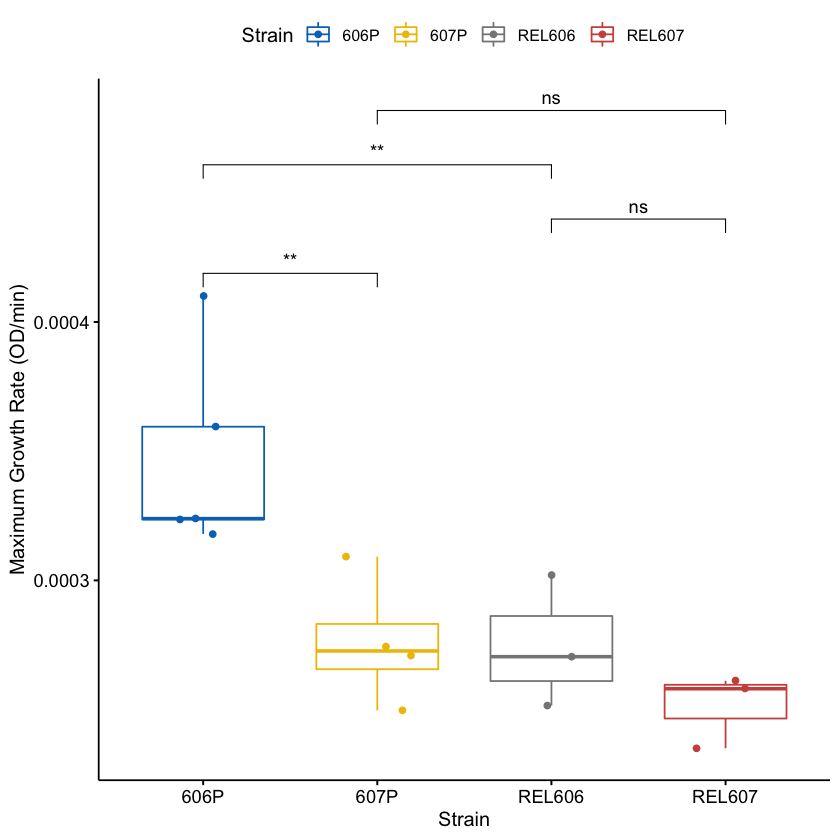

In [6]:
# Plot
#pdf("FigureS1_C.pdf")
ggboxplot(exp15, x = "Strain", y = "Max_deriv",
          color = "Strain", palette = "jco",add="jitter")+
stat_compare_means(comparisons = my_comparisons,method ="t.test",p.adjust.method = "fdr",var.equal
=F,label="p.signif",method.args = list(alternative = "greater"))+ylab("Maximum Growth Rate (OD/min)")+ 
scale_y_continuous(labels = function(x) format(x, scientific = F))+
                    font("x.text", size = 11)+font("y.text", size = 11)
#dev.off()

## Growth at $37^\circ{}C$

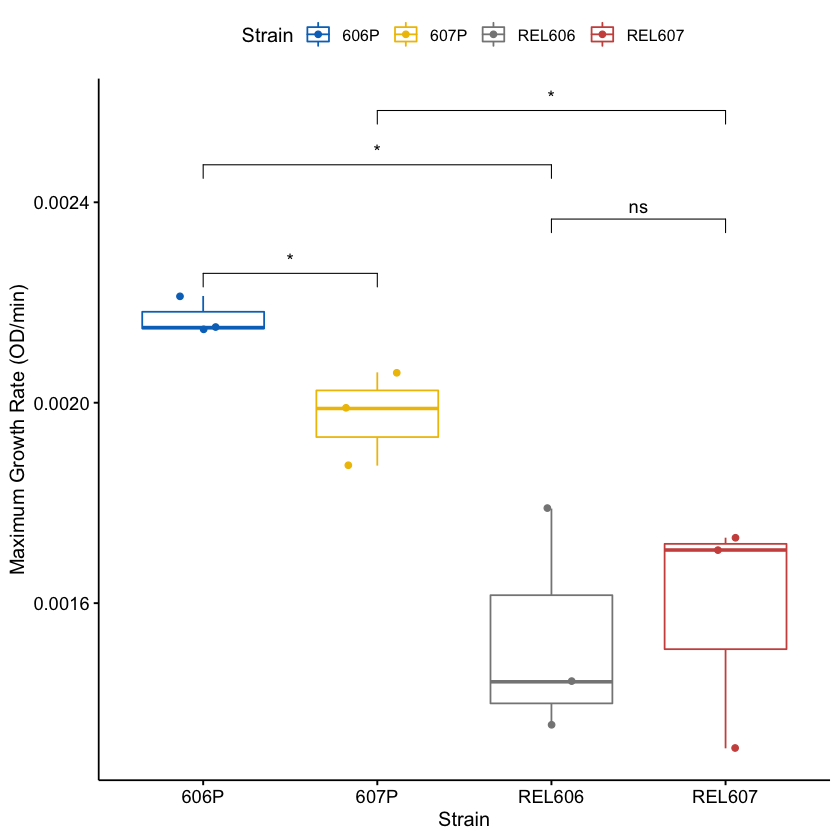

In [7]:
# Plot
#pdf("FigureS1_B.pdf")
 ggboxplot(exp37, x = "Strain", y = "Max_deriv",
          color = "Strain", palette = "jco",add="jitter")+
stat_compare_means(comparisons = my_comparisons,method ="t.test",
                   method.args = list(alternative = "greater"),
                   p.adjust.method = "fdr",var.equal
=F,label="p.signif")+ylab("Maximum Growth Rate (OD/min)")+ 
scale_y_continuous(labels = function(x) format(x, scientific = F)) +  
                   font("x.text", size = 11)+font("y.text", size = 11)
#dev.off()

# Figure S2:

In [8]:
# Read the data
dependent =  read.csv("../../data/dependent_15.csv")
dependent$X = factor(paste(dependent$Strain, dependent$Type,sep="_"))
head(dependent,n=2)
table(dependent$X)
levels(dependent$X)

,Strain,Type,Max_deriv,X,X.1,X.2,X.3
,<fct>,<fct>,<dbl>,<fct>,<lgl>,<lgl>,<lgl>
1,S606-2,Acclimation,0.000277410,S606-2_Acclimation,NA,NA,NA
2,S606-2,Acclimation,0.000278906,S606-2_Acclimation,NA,NA,NA



  606P_Acclimation     606P_Condition   607P_Acclimation     607P_Condition 
                 3                  3                  3                  3 
F606-2_Acclimation   F606-2_Condition S606-2_Acclimation   S606-2_Condition 
                 3                  3                  3                  3 
S607-1_Acclimation   S607-1_Condition S607-2_Acclimation   S607-2_Condition 
                 3                  3                  4                  4 

[1] "606P_Acclimation"   "606P_Condition"     "607P_Acclimation"  
 [4] "607P_Condition"     "F606-2_Acclimation" "F606-2_Condition"  
 [7] "S606-2_Acclimation" "S606-2_Condition"   "S607-1_Acclimation"
[10] "S607-1_Condition"   "S607-2_Acclimation" "S607-2_Condition"

In [9]:
comp_dep = list(c("607P_Acclimation","607P_Condition"), 
                c("606P_Acclimation","606P_Condition"),
                c("F606-2_Acclimation","F606-2_Condition"),
                c("S606-2_Acclimation","S606-2_Condition"),
                c("S607-1_Acclimation","S607-1_Condition"),
                c("S607-2_Acclimation","S607-2_Condition"))

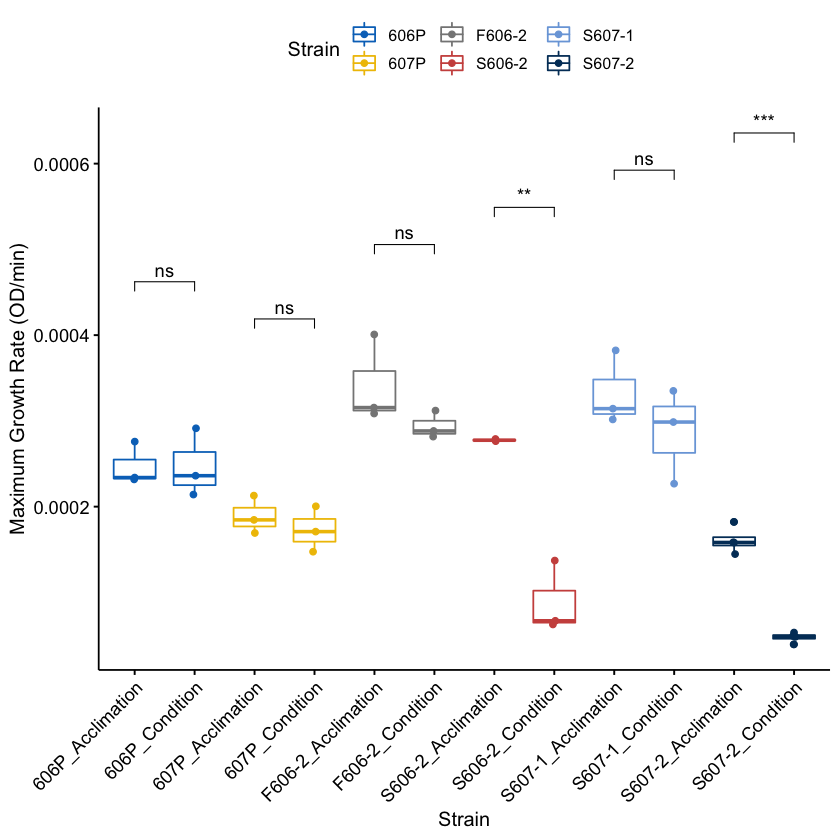

In [10]:
#pdf("FigureS2_dependent_15.pdf")
ggboxplot(dependent, x = "X", y = "Max_deriv",
          color = "Strain", palette = "jco",add="jitter")+
stat_compare_means(comparisons = comp_dep,method ="t.test",
                   method.args = list(alternative = "greater"),
                   p.adjust.method = "fdr",var.equal
=F,label="p.signif")+ylab("Maximum Growth Rate (OD/min)")+ 
xlab("Strain")+
scale_y_continuous(labels = function(x) format(x, scientific = F)) +  
                   font("x.text", size = 11)+font("y.text", size = 11)+
     theme(axis.text.x=element_text(angle=45, hjust=1))
#dev.off()

# Table 1

In [11]:
# Read the data
clones =  read.csv('../../data/growth_strains_new.csv')
head(clones,n=5)

,Treatment,Linage,Strain,Type,Experiment,Temperature,Max_deriv,Lag,k
,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>
1,Media,607,607P,Reference,4_5_17,43,0.001361278,374.8869,0.3902098
2,Media,607,607P,Reference,4_5_17,43,0.001462898,383.5978,0.2912906
3,Media,607,607P,Reference,4_5_17,43,0.001672362,373.3310,0.3517848
4,Random,607,R607-4,Clone,4_5_17,43,0.001704033,497.1238,0.5303027
5,Random,607,R607-4,Clone,4_5_17,43,0.002114594,469.5611,0.2910426


In [14]:
# Calculate the average
sum_clones = clones %>% group_by(Linage,Strain,Treatment,Experiment,Temperature,Type)  %>%
summarise(Mean = mean(Max_deriv), Std = sd(Max_deriv), Cv = sd(Max_deriv)/mean(Max_deriv), n= n() ) %>% ungroup()
sum_clones$Experiment = as.character(sum_clones$Experiment)
head(sum_clones)

`summarise()` regrouping output by 'Linage', 'Strain', 'Treatment', 'Experiment', 'Temperature' (override with `.groups` argument)



Linage,Strain,Treatment,Experiment,Temperature,Type,Mean,Std,Cv,n
<int>,<fct>,<fct>,<chr>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>
606,606P,Media,1_6_17,15,Reference,0.0002730197,3.369416e-05,0.12341295,3
606,606P,Media,11_3_18,43,Reference,0.0021580150,4.063893e-04,0.18831625,3
606,606P,Media,13_5_17,43,Reference,0.0019912837,1.383421e-04,0.06947383,3
606,606P,Media,13_7_17,43,Reference,0.0011670363,8.500541e-05,0.07283871,4
606,606P,Media,26_5_17,43,Reference,0.0011346857,2.079793e-04,0.18329243,3
606,606P,Media,27_5_17,15,Reference,0.0003349167,3.028455e-05,0.09042413,3


In [15]:
# Significant
clones = clones %>% distinct() %>% mutate(Group  = factor(paste(Strain,Experiment,Temperature,sep ="_")))
references = clones %>% filter(Type == "Reference")
cloners = clones %>% filter(Type == "Clone") %>% droplevels()
Strain = factor(unique(cloners$Group))
significant = data.frame(vars=double(),Strain=factor(),Temperature=integer())
for (i in 1:length(factor(unique(cloners$Group)))){
    strain = Strain[i]
    test = cloners %>% filter(Group == strain)
    ref = references %>% filter(Experiment == test$Experiment[1] & Type == "Reference" & Linage ==  test$Linage[1])
    d = rbind(ref,test)
    # Sanity plot
    filename = paste(strain,test$Temperature[1],sep="_")
    pdf(filename)
    boxplot(d$Max_deriv~d$Type)
    dev.off()
    # t.test
    var_q = bartlett.test(Max_deriv~Type,d)
    var_T = (var_q$p.value>0.05)
    sig = d %>% summarise_each(funs(t.test(.[Type == "Clone"], .[Type == "Reference"],
                                           var.equal=var_T,alternative="greater")$p.value), 
                                           vars = Max_deriv)
    sig$Strain = test$Strain[1]
    sig$Temperature = test$Temperature[1]
    significant =  rbind(significant,sig)
    }
# Reshape
Growth = significant %>% distinct() %>% spread(Temperature, vars)
Growth$Strain = factor(Growth$Strain, levels = c("R606-1", "R606-2", "R606-3", "R606-4","F606-1", "F606-2", "F606-3", "F606-4", "S606-1", "S606-2", "S606-3", "S606-4",
"R607-1", "R607-2", "R607-3", "R607-4","F607-1", "F607-2", "F607-3", "F607-4", "S607-1", "S607-2", "S607-3", "S607-4"))
Growth = Growth %>% arrange(Strain)
Growth

Warning message:
“`summarise_each_()` is deprecated as of dplyr 0.7.0.
Please use `across()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”
Warning message:
“`funs()` is deprecated as of dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


Strain,15,43
<fct>,<dbl>,<dbl>
R606-1,0.6275299942,0.1200206812
R606-2,0.1494628257,0.0052475023
R606-3,0.5858331420,0.1969308964
R606-4,0.3217729014,0.0154416711
F606-1,0.5737655565,0.0089207423
F606-2,0.0659491216,0.0012714073
F606-3,0.4382065089,0.0009069136
F606-4,0.0104828433,0.0609585900
S606-1,0.0764499937,0.0297212134


In [16]:
# Replicate table 1
sum_clones$RelFit = 0
for (i in 1:nrow(sum_clones)){
    row_df = sum_clones[i,]
    reference =sum_clones %>% 
    filter(Experiment == as.character(row_df["Experiment"]) & 
           Type == "Reference" & 
           Temperature == as.numeric(row_df["Temperature"]) & 
           Linage == as.character(row_df["Linage"]) )
    sum_clones$RelFit[i] = row_df$Mean/reference$Mean
    
    
}
fitness_table = sum_clones %>% arrange(Linage, Temperature) %>% filter(Type == "Clone")
table1 = fitness_table %>% dplyr::select(Strain,Temperature,RelFit,Treatment,Linage)  %>% distinct() %>% spread(Temperature, RelFit)
table1$Strain = factor(table1$Strain, levels = c("R606-1", "R606-2", "R606-3", "R606-4","F606-1", "F606-2", "F606-3", "F606-4", "S606-1", "S606-2", "S606-3", "S606-4",
"R607-1", "R607-2", "R607-3", "R607-4","F607-1", "F607-2", "F607-3", "F607-4", "S607-1", "S607-2", "S607-3", "S607-4"))
table1 = table1 %>% arrange(Strain)
table1 

Strain,Treatment,Linage,15,43
<fct>,<fct>,<int>,<dbl>,<dbl>
R606-1,Random,606,0.9372627,1.094937
R606-2,Random,606,1.0921164,1.203291
R606-3,Random,606,0.9769203,1.117216
R606-4,Random,606,1.0193705,1.189928
F606-1,Fast,606,0.9761234,1.237650
F606-2,Fast,606,1.1893348,1.443777
F606-3,Fast,606,1.0308395,1.355158
F606-4,Fast,606,1.4004156,1.175464
S606-1,Slow,606,1.5209091,1.352762


In [17]:
colnames(Growth) = c("Strain","Sig15","Sig43")
Growth

Strain,Sig15,Sig43
<fct>,<dbl>,<dbl>
R606-1,0.6275299942,0.1200206812
R606-2,0.1494628257,0.0052475023
R606-3,0.5858331420,0.1969308964
R606-4,0.3217729014,0.0154416711
F606-1,0.5737655565,0.0089207423
F606-2,0.0659491216,0.0012714073
F606-3,0.4382065089,0.0009069136
F606-4,0.0104828433,0.0609585900
S606-1,0.0764499937,0.0297212134


In [18]:
# Add the pvalues
table1 = full_join(table1,Growth, by = "Strain")

In [19]:
# We will assume that a not significant pvalue implies a ration of 1
table2 = table1
# First deal with the internalized cases
table2$Sig15[table2$Strain == "S607-2"] = (1- table1$Sig15[table1$Strain == "S607-2"])
table2$Sig15[table2$Strain == "S606-2"] = (1- table1$Sig15[table1$Strain == "S606-2"])
table2$`15`[table2$Sig15 >0.05]  = 1
table2$`43`[table2$Sig43 >0.05]  = 1

In [20]:
# Signs
table2$`15` = -1*table2$`15`
SigTable = gather(table2,Temperature,Fitness,c(`15`,`43`))
SigTable

Strain,Treatment,Linage,Sig15,Sig43,Temperature,Fitness
<fct>,<fct>,<int>,<dbl>,<dbl>,<chr>,<dbl>
R606-1,Random,606,0.6275299942,0.1200206812,15,-1.0000000
R606-2,Random,606,0.1494628257,0.0052475023,15,-1.0000000
R606-3,Random,606,0.5858331420,0.1969308964,15,-1.0000000
R606-4,Random,606,0.3217729014,0.0154416711,15,-1.0000000
F606-1,Fast,606,0.5737655565,0.0089207423,15,-1.0000000
F606-2,Fast,606,0.0659491216,0.0012714073,15,-1.0000000
F606-3,Fast,606,0.4382065089,0.0009069136,15,-1.0000000
F606-4,Fast,606,0.0104828433,0.0609585900,15,-1.4004156
S606-1,Slow,606,0.0764499937,0.0297212134,15,-1.0000000


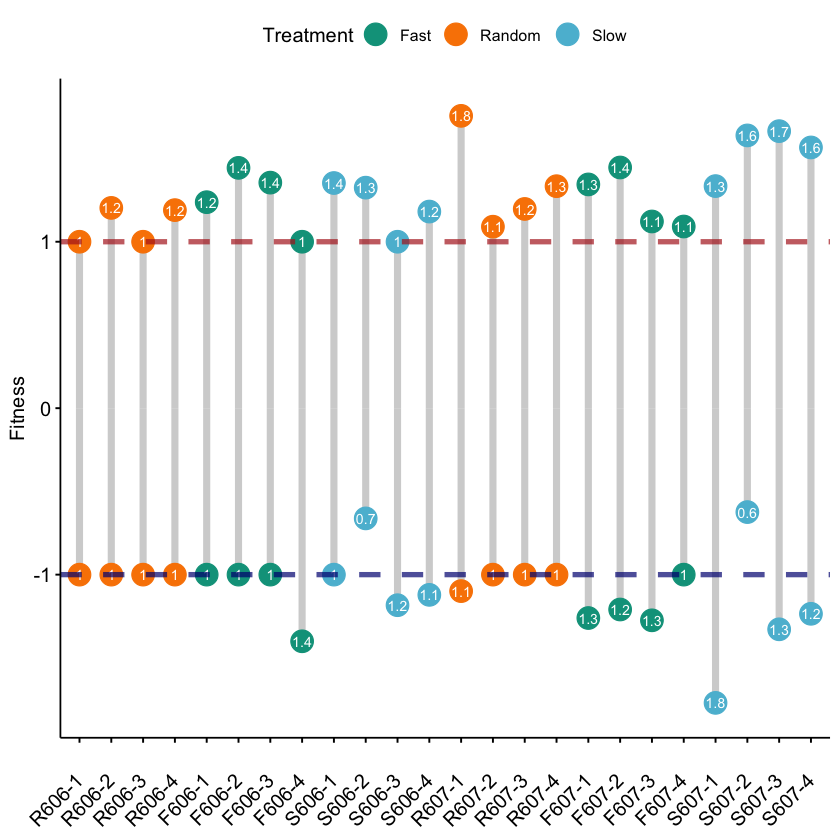

In [21]:
#pdf("Figure3_A.pdf")
ggdotchart(SigTable, x = "Strain", y = "Fitness",
           color = "Treatment",
           fill = "Temperature",
           # Color by groups
           palette = c("#00A08A",'#F98400','#5BBCD6'), # Custom color palette
           #sorting = "asc",                       # Sort value in descending order
           add = "segments",                             # Add segments from y = 0 to dots
           add.params = list(color = "lightgray", size = 2), # Change segment color and size
           group = "Strain",                                # Order by groups
           dot.size = 6,                                 # Large dot size
           label = abs(round(SigTable$Fitness,1)),                        # Add mpg values as dot labels
           font.label = list(color = "white", size = 9, 
                             vjust = 0.5),               # Adjust label parameters
           ggtheme = theme_pubr(),
           ylim = c(-1.8,1.8),# ggplot2 theme,

           )+
   geom_hline(yintercept = 1, linetype = 2, color = "firebrick",size=1.5,alpha=0.7)+
   geom_hline(yintercept = -1, linetype = 2, color = "navy",size=1.5,alpha=0.7)+
     theme(axis.text.x=element_text(angle=45, hjust=1))+labs(x="")
#dev.off()

In [23]:
# Classify accordingly
StrategyTable = table2 %>% mutate(., Strategy = if_else(`15`<(-1) & `43`>1,
                                        "Generalist",if_else(`15`<(-1) & `43`<1,"Specialist",
                                                             if_else(`15`>=(-1) & `43`>1,"Specialist",
                                                                     "Other"))))

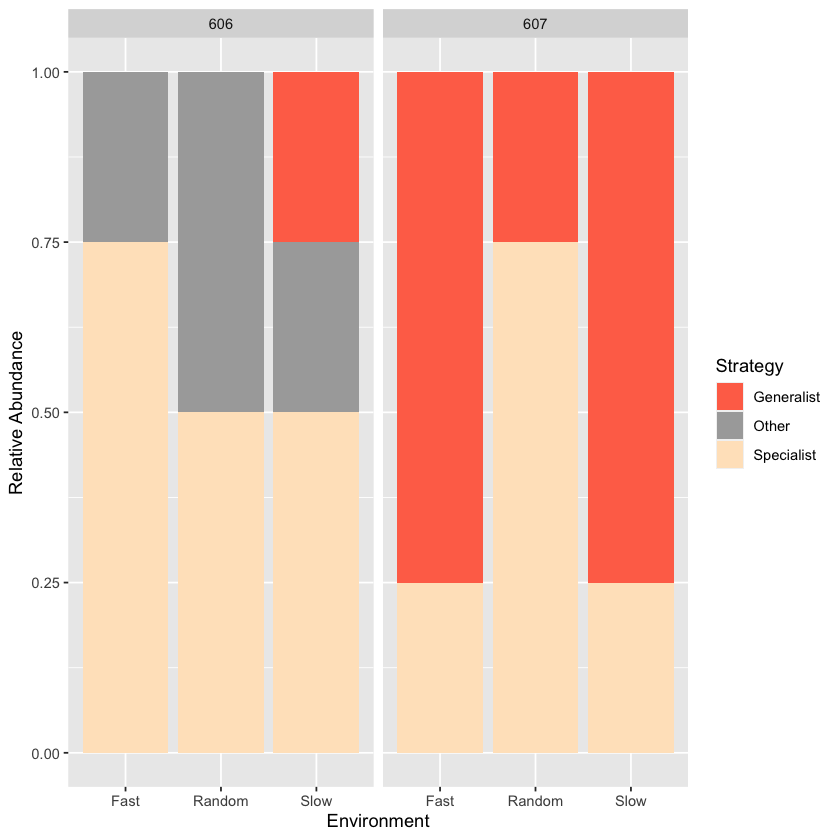

In [24]:
#pdf("Figure3B.pdf")
ggplot(StrategyTable) + aes(x = Treatment, fill =Strategy)+
  geom_bar(position = "fill")+ 
  scale_fill_manual(values= c("coral1","darkgray","bisque1") )+ ylab("Relative Abundance") + 
  xlab("Environment")+facet_wrap("Linage")
#dev.off()

In [26]:
write.csv(StrategyTable,"StrategyTable.csv")